In [1]:
%load_ext autoreload
%autoreload 2

from https://www.microscopyu.com/microscopy-basics/properties-of-microscope-objectives 

100x oil: NA = 1.4 

60x air: NA = 0.95 

40x air: NA = 0.95 

20x air: NA = 0.75 

10x air: NA = 0.45 

4x air: NA = 0.2 

2x air: NA = 0.1 

In [2]:
# import sys
# sys.path.insert(1, '/home/georgeos/Documents/GitHub/SyMBac/') # Not needed if you installed SyMBac using pip

from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images
real_image = get_sample_images()["E. coli 100x"]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\robho\OneDrive\Desktop\Uni Work\Year 4\project2\SyMBac\cell_simulation.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
from scipy.ndimage import gaussian_filter
from interpolate import linear_interpolate
from interpolate import extend_background

In [4]:
for image in get_sample_images():
    print(get_sample_images()[image].shape)
    print(image)

(256, 46)
E. coli 100x
(256, 46)
E. coli 100x stationary
(256, 32)
E. coli DeLTA
(256, 46)
E. coli 100x fluorescence


In [5]:
pmcs = np.array([1,10/6,10/4,10/3.5,10/3,10/2.5,10/2,10/1])*0.0655

In [6]:
from SyMBac_copy.simulation import Simulation as Simulation2
from SyMBac_copy.PSF import PSF_generator as PSF_generator2
from SyMBac_copy.renderer import Renderer as Renderer2
from SyMBac_copy.PSF import Camera as Camera2
from SyMBac_copy.misc import get_sample_images as get_sample_images2
real_image = get_sample_images2()["E. coli 100x"]

# 100x

In [7]:
my_simulation = Simulation2(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = pmcs[2],
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [8]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

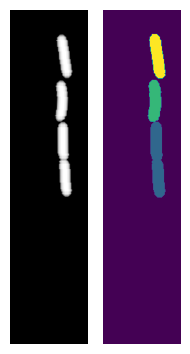

In [11]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

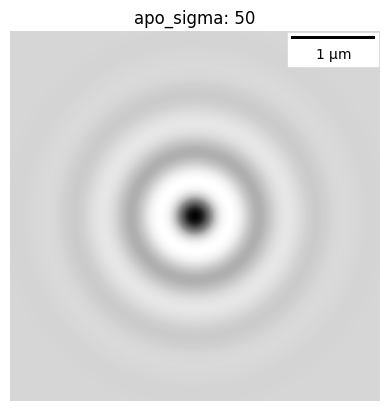

In [11]:
# A 2D phase contrast kernel
my_kernel = PSF_generator(
    radius = 100,
    wavelength = 0.6,
    NA = 1.45,
    n = 1.5,
    resize_amount = 3,
    pix_mic_conv = pmcs[2],
    apo_sigma = 50,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [12]:
(my_kernel.kernel).shape

(201, 201)

In [13]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image)

In [14]:
ml = np.array(pd.read_csv("media_label.csv",header=None))
cl = np.array(pd.read_csv("cell_label.csv",header=None))
dl = np.array(pd.read_csv("device_label.csv",header=None))

In [15]:
my_renderer.select_intensity_napari(ml,cl,dl)

In [16]:
# pd.DataFrame(my_renderer.media_label.data).to_csv("media_label.csv",header=0,index=False)
# pd.DataFrame(my_renderer.cell_label.data).to_csv("cell_label.csv",header=0,index=False)
# pd.DataFrame(my_renderer.device_label.data).to_csv("device_label.csv",header=0,index=False)

In [17]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [1]:
# my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=40, n_samples = 800, save_dir="data/100x", in_series=False)

# 60x

(153, 27)


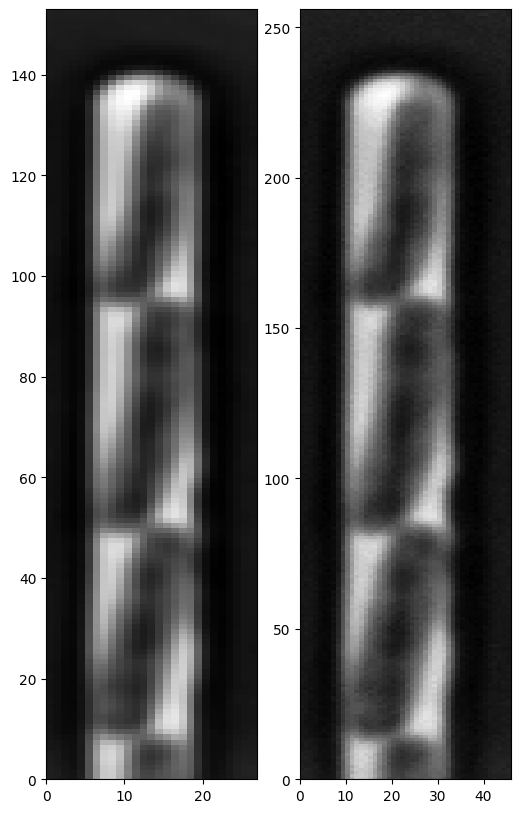

In [18]:
target_shape = (int(real_image.shape[0]*6/10),int(real_image.shape[1]*6/10))
real_image60 = linear_interpolate(gaussian_filter(real_image,sigma=1),target_shape)
print(real_image60.shape)
fig, axs = plt.subplots(1,2, figsize= (6,10))
axs[0].pcolor(real_image60[::-1],cmap='Greys_r')
axs[1].pcolor(real_image[::-1],cmap='Greys_r')
plt.show()

In [12]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_convs = pmcs[1],
    gravity=0,
    phys_iters=5,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [13]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [14]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

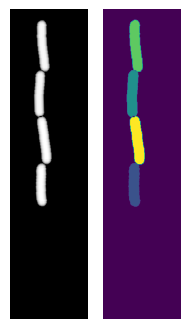

In [15]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

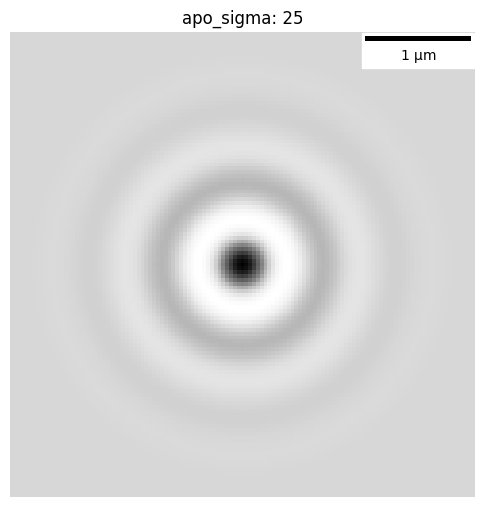

In [19]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 60,
    wavelength = 0.6,
    NA = 0.95,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = pmcs[1],
    apo_sigma = 25,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [21]:
my_renderer = Renderer(simulation = my_simulation, PSF_list = [my_kernel], real_image_list = [real_image60])

In [22]:
my_renderer.select_intensity_napari()

In [25]:
(my_renderer.optimise_synth_image(manual_update=False))[0]

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

# 40x

(102, 18)


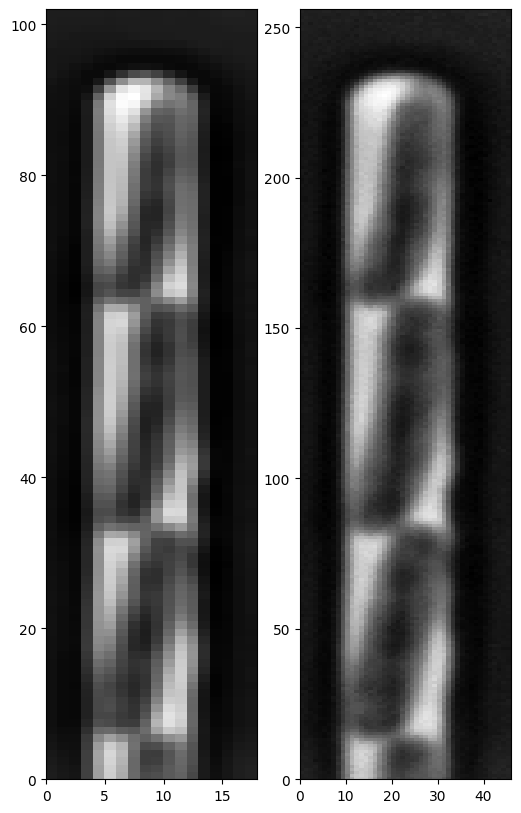

In [26]:
target_shape = (int(real_image.shape[0]*4/10),int(real_image.shape[1]*4/10))
real_image40 = linear_interpolate(gaussian_filter(real_image,sigma=1.5),target_shape)
print(real_image40.shape)
fig, axs = plt.subplots(1,2, figsize= (6,10))
axs[0].pcolor(real_image40[::-1],cmap='Greys_r')
axs[1].pcolor(real_image[::-1],cmap='Greys_r')
plt.show()

In [27]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_convs = pmcs[2],
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [28]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [29]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

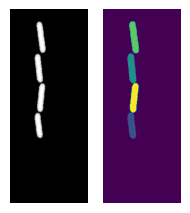

In [30]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

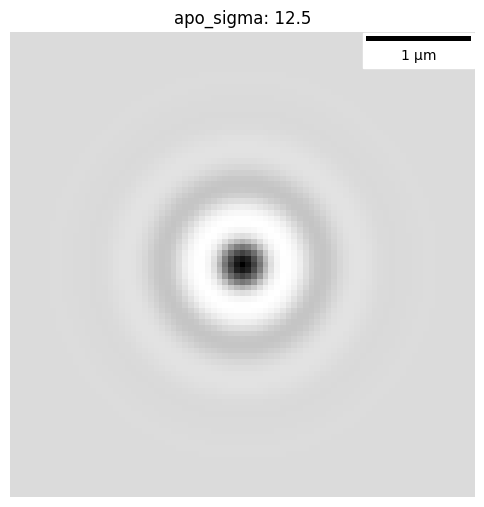

In [31]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 40,
    wavelength = 0.6,
    NA = 0.95,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = pmcs[2],
    apo_sigma = 12.5,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [34]:
my_renderer = Renderer(simulation = my_simulation, PSF_list = [my_kernel], real_image_list = [real_image40])

In [35]:
my_renderer.select_intensity_napari()

In [37]:
my_renderer.optimise_synth_image(manual_update=False)[0]

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

# 35x

In [22]:
real_image35 = np.zeros((np.array(real_image.shape)//[256/172,46/39]).astype(int))
a,b = real_image35.shape
for i in range(a):
    for j in range(b):
        real_image35[i,j] = real_image[int(256/172*i),int(46/39*j)]

In [6]:
plt.pcolor(real_image35, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

NameError: name 'plt' is not defined

In [7]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.18,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [8]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

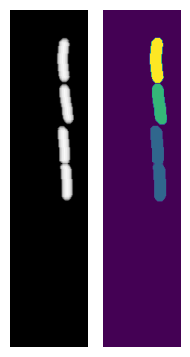

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


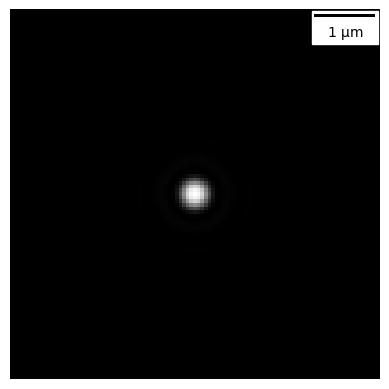

In [11]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.9,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.18,
    apo_sigma = None,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [23]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image35)

AYOOOOOOOOOOOOO
(172, 38)
(173, 40)


In [24]:
my_renderer.select_intensity_napari()

In [25]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

# 30x

In [5]:
real_image30 = np.zeros((np.array(real_image.shape)//[256/147,46/36]).astype(int))
a,b = real_image30.shape
for i in range(a):
    for j in range(b):
        real_image30[i,j] = real_image[int(256/147*i),int(46/36*j)]

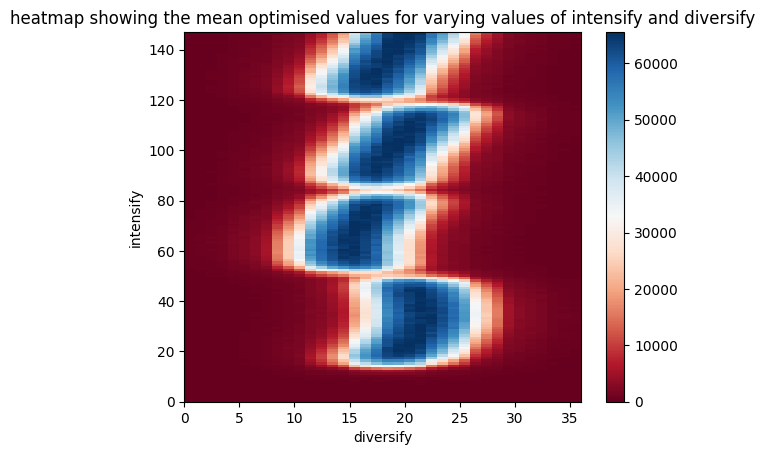

In [6]:
plt.pcolor(real_image30, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [7]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.21,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [8]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

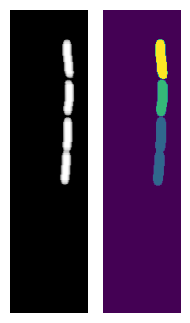

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


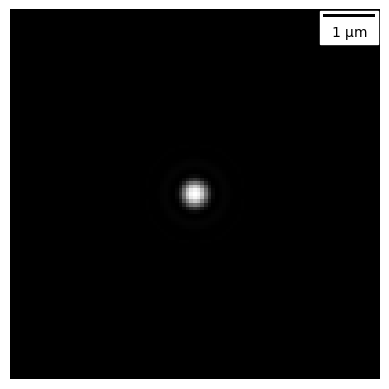

In [11]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.85,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.21,
    apo_sigma = None,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [12]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image30)

AYOOOOOOOOOOOOO
(147, 36)
(149, 37)


In [13]:
my_renderer.select_intensity_napari()

In [14]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

# 25x

In [33]:
real_image25 = np.zeros((np.array(real_image.shape)//[256/122,46/27]).astype(int))
a,b = real_image25.shape
for i in range(a):
    for j in range(b):
        real_image25[i,j] = real_image[int(256/122*i),int(46/27*j)]

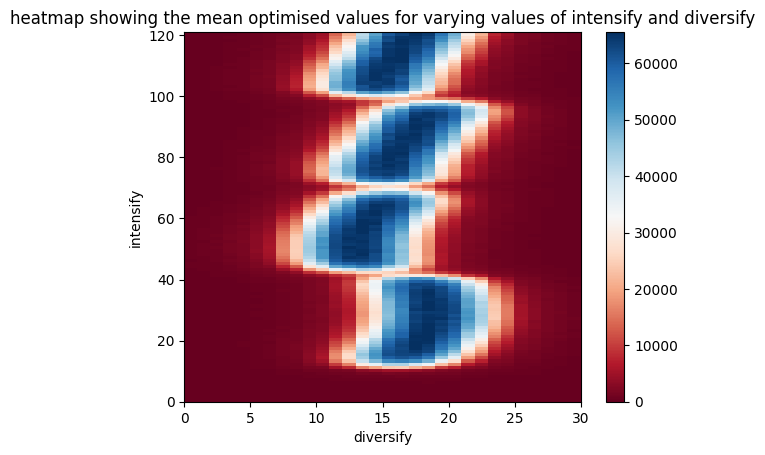

In [17]:
plt.pcolor(real_image25, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [19]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.26,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [20]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [21]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

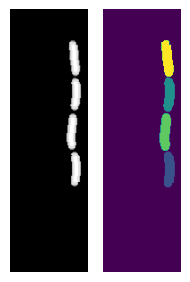

In [22]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


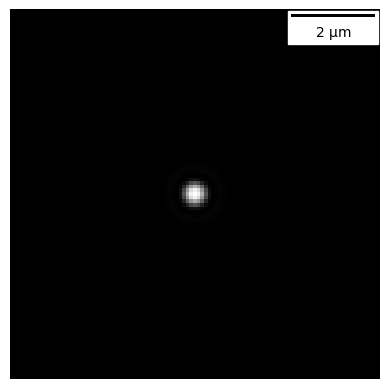

In [23]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.8,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.26,
    apo_sigma = None,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [34]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image25)

AYOOOOOOOOOOOOO
(121, 26)
(122, 28)


In [35]:
my_renderer.select_intensity_napari()

In [36]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

# 20x

In [4]:
real_image20 = np.zeros((np.array(real_image.shape)//[256/100,46/30]).astype(int))
a,b = real_image20.shape
for i in range(a):
    for j in range(b):
        real_image20[i,j] = real_image[int(2.56*i),int(46/30*j)]

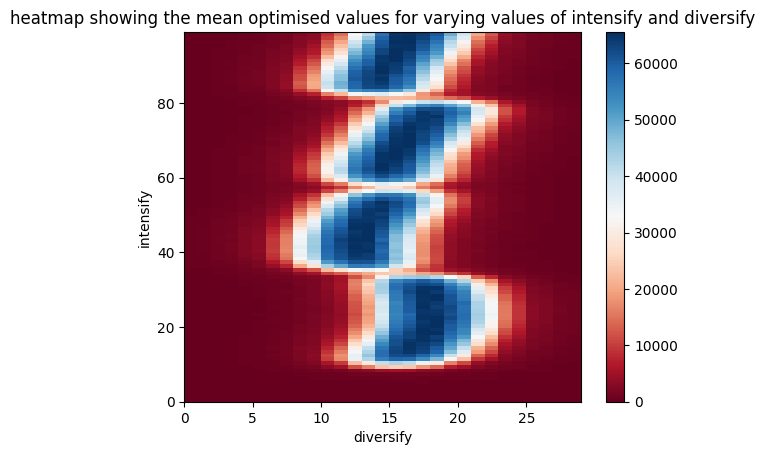

In [5]:
plt.pcolor(real_image20, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [6]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.32,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [7]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

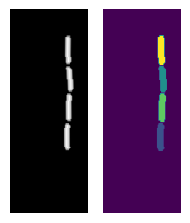

In [9]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

HhahahahahhahahahAAAHAHAHAHH


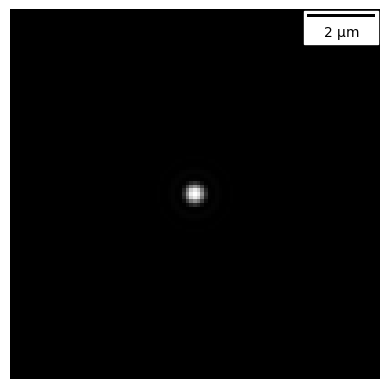

In [10]:
# A 2D phase contrastrescence kernel based on Airy
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.6,
    NA = 0.75,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.32,
    apo_sigma = None,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

In [11]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image20)

AYOOOOOOOOOOOOO
(99, 29)
(100, 33)


In [12]:
my_renderer.select_intensity_napari()

In [13]:
my_renderer.optimise_synth_image(manual_update=False)

interactive(children=(IntSlider(value=88, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

# 10x

In [ ]:
real_image20 = np.zeros((np.array(real_image.shape)//[256/100,46/30]).astype(int))
a,b = real_image20.shape
for i in range(a):
    for j in range(b):
        real_image20[i,j] = real_image[int(2.56*i),int(46/30*j)]

In [ ]:
plt.pcolor(real_image20, cmap='RdBu')
plt.title(r"heatmap showing the mean optimised values for varying values of intensify and diversify")
plt.xlabel(r'diversify')
plt.ylabel(r'intensify')
plt.colorbar()
plt.show()

In [63]:
my_simulation = Simulation(
    trench_length=15,
    trench_width=1.4,
    cell_max_length=6, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.65,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.01,
    width_var = 0.01,
    lysis_p = 0.,
    save_dir="C:\\Users\\robho\\OneDrive\\Desktop\\Uni Work\\Year 4\\project2",
    resize_amount = 3
)

In [64]:
my_simulation.run_simulation(show_window=False)

  0%|          | 0/100 [00:00<?, ?it/s]

In [65]:
my_simulation.draw_simulation_OPL(do_transformation=True, label_masks=True)

Timeseries Properties:   0%|          | 0/98 [00:00<?, ?it/s]

Scene Draw::   0%|          | 0/98 [00:00<?, ?it/s]

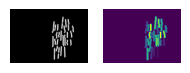

In [66]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()